In [1]:
options(warn=-1) # suppress warnings that clutter output

# install R packages
r_packages <- c(
  "ggplot2", "cowplot", "scales", "reshape2", 
  "dplyr", "magrittr", "tidyverse", "stringr",
  "IRdisplay", "ggpubr", "RColorBrewer")

suppressMessages(invisible(
  lapply(r_packages, library, character.only=TRUE)))

sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 14.04.5 LTS

Matrix products: default
BLAS/LAPACK: /fh/fast/bloom_j/software/conda/envs/BloomLab_v2/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2 ggpubr_0.2         IRdisplay_0.7.0    forcats_0.3.0     
 [5] stringr_1.3.1      purrr_0.2.5        readr_1.1.1        tidyr_0.8.1       
 [9] tibble_1.4.2       tidyverse_1.2.1    magrittr_1.5       dplyr_0.7.8       
[13] reshape2_1.4.3     scales_1.0.0       cowplo

In [2]:
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#0072B2", "#D55E00", "#CC79A7")
# The palette with black
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
                "#0072B2", "#D55E00", "#CC79A7")

In [3]:
ha_barcodecounts <- read.delim("ha_barcode_counts.csv", sep=',')
na_barcodecounts <- read.delim("na_barcode_counts.csv", sep=',')
barcodecounts <- rbind(ha_barcodecounts, na_barcodecounts)
head(barcodecounts)

X,bc_rank,barcode,count,sample,sample_number,barcoded_segments,step,replicate,titer,gene,datatype,datafile
0,0,TATTCATTCCTCTTTC,126456,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz
1,1,ATACCTCATGCTGAAG,66118,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz
2,2,CGGAATATCATTGAGA,61886,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz
3,3,TTATTTGTCCCTCGAA,56785,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz
4,4,ATGTCGATTGTACTGC,49810,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz
5,5,CCCCCGAATCCAGCAC,38755,3_Rescue_bcHA_HA,3,bcHA,Rescue,None,3162.278,fluHA,viral_barcode_fastqs,3-Rescue-bcHA-HA_S1_L001_R1_001.fastq.gz


In [4]:
barcodecounts <- barcodecounts %>% select(-X, -bc_rank, -titer, -datatype, -datafile, -sample, -sample_number)
head(barcodecounts)

barcode,count,barcoded_segments,step,replicate,gene
TATTCATTCCTCTTTC,126456,bcHA,Rescue,None,fluHA
ATACCTCATGCTGAAG,66118,bcHA,Rescue,None,fluHA
CGGAATATCATTGAGA,61886,bcHA,Rescue,None,fluHA
TTATTTGTCCCTCGAA,56785,bcHA,Rescue,None,fluHA
ATGTCGATTGTACTGC,49810,bcHA,Rescue,None,fluHA
CCCCCGAATCCAGCAC,38755,bcHA,Rescue,None,fluHA


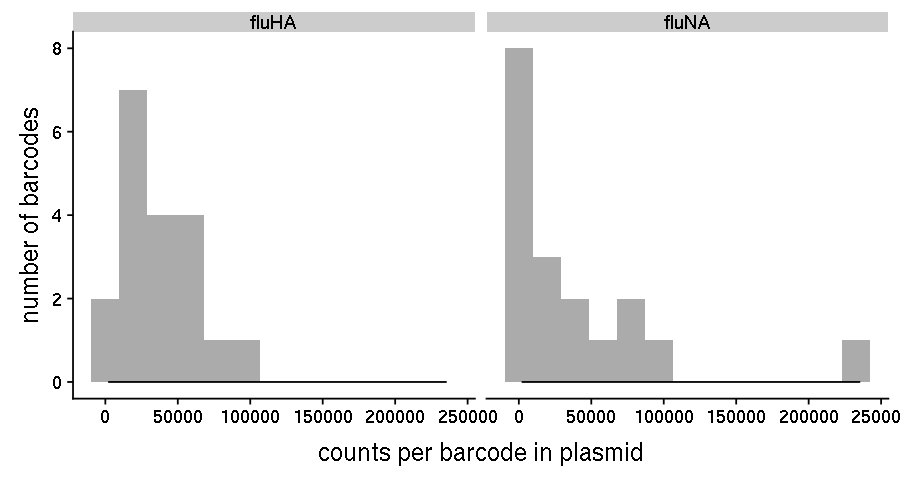

In [5]:
options(repr.plot.width=7.5, repr.plot.height=4)

ggplot(
  barcodecounts %>%
    filter(step=='Plasmid'),
    aes(x=count, y=..count..)) +
  geom_histogram(bins=13, poition = "dodge", alpha=0.5) +
  geom_density() +
  facet_wrap(~gene,) +
  ylab('number of barcodes') +
  xlab('counts per barcode in plasmid')

In [6]:
barcodecounts <- barcodecounts %>% 
  group_by(gene, step, barcoded_segments, replicate) %>%
  mutate(total_sample_reads=sum(count)) %>%
  ungroup %>%
  mutate(barcode_freq=count / total_sample_reads)

head(barcodecounts)

barcode,count,barcoded_segments,step,replicate,gene,total_sample_reads,barcode_freq
TATTCATTCCTCTTTC,126456,bcHA,Rescue,None,fluHA,578973,0.21841433
ATACCTCATGCTGAAG,66118,bcHA,Rescue,None,fluHA,578973,0.11419876
CGGAATATCATTGAGA,61886,bcHA,Rescue,None,fluHA,578973,0.10688927
TTATTTGTCCCTCGAA,56785,bcHA,Rescue,None,fluHA,578973,0.09807884
ATGTCGATTGTACTGC,49810,bcHA,Rescue,None,fluHA,578973,0.08603165
CCCCCGAATCCAGCAC,38755,bcHA,Rescue,None,fluHA,578973,0.06693749


In [7]:
barcodecounts <- barcodecounts %>%
  group_by(gene, barcode) %>%
  mutate(plasmid_barcode_freq=barcode_freq[step == "Plasmid"],
         fold_change_from_plasmid=barcode_freq / plasmid_barcode_freq,
         log2fc_plasmid = log2(fold_change_from_plasmid), 
        ) 

head(barcodecounts)

barcode,count,barcoded_segments,step,replicate,gene,total_sample_reads,barcode_freq,plasmid_barcode_freq,fold_change_from_plasmid,log2fc_plasmid
TATTCATTCCTCTTTC,126456,bcHA,Rescue,None,fluHA,578973,0.21841433,0.07514621,2.9065249,1.5392953
ATACCTCATGCTGAAG,66118,bcHA,Rescue,None,fluHA,578973,0.11419876,0.08973867,1.2725702,0.3477453
CGGAATATCATTGAGA,61886,bcHA,Rescue,None,fluHA,578973,0.10688927,0.13064588,0.8181603,-0.2895446
TTATTTGTCCCTCGAA,56785,bcHA,Rescue,None,fluHA,578973,0.09807884,0.07445140,1.3173539,0.3976430
ATGTCGATTGTACTGC,49810,bcHA,Rescue,None,fluHA,578973,0.08603165,0.04730686,1.8185871,0.8628180
CCCCCGAATCCAGCAC,38755,bcHA,Rescue,None,fluHA,578973,0.06693749,0.05679977,1.1784816,0.2369293


In [8]:
barcodecounts$step <- factor(barcodecounts$step,
                                  levels = c("Plasmid","Rescue","Passage1","Passage2","Passage3"))

In [9]:
barcodecounts_vplasmid <- barcodecounts %>%
  select(-count, -total_sample_reads, 
         -barcode_freq, -plasmid_barcode_freq, 
         -fold_change_from_plasmid) %>%
  spread(replicate, log2fc_plasmid)

head(barcodecounts_vplasmid)

barcode,barcoded_segments,step,gene,A,B,None
AATTCGGGTCAGCTTC,bcHA,Plasmid,fluHA,NA,NA,0.0000000
AATTCGGGTCAGCTTC,bcHA,Rescue,fluHA,NA,NA,0.0494881
AATTCGGGTCAGCTTC,bcHA,Passage1,fluHA,0.2697953,0.297588621,NA
AATTCGGGTCAGCTTC,bcHA,Passage2,fluHA,0.4648823,-0.090283340,NA
AATTCGGGTCAGCTTC,bcHA,Passage3,fluHA,0.3535015,-0.009055132,NA
AATTCGGGTCAGCTTC,bcHAbcNA,Rescue,fluHA,NA,NA,-0.4828406


### Plot log2 fold-change vs plasmid for each gene, each replicate

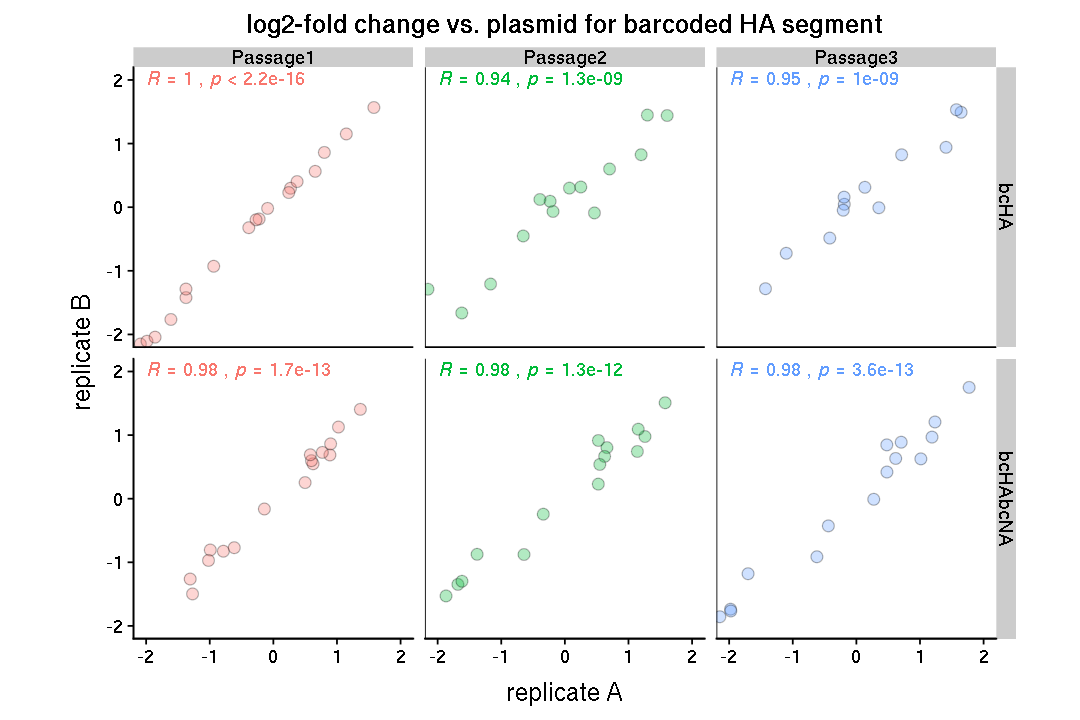

In [10]:
# Plot log2fc_plasmid for fluHA
options(repr.plot.width=9, repr.plot.height=6)

ggplot(
   barcodecounts_vplasmid %>%
      filter(step!='Rescue', step!='Plasmid', gene=='fluHA'),
    aes(A, B, color=step)) +
    facet_grid(barcoded_segments~step) +
  geom_point(aes(fill=step), color="black", pch=21, size=3, alpha=0.3) +
  theme(legend.position='none', aspect.ratio=1) +
  coord_equal(xlim=c(-2,2),ylim=c(-2,2)) +
  stat_cor(method='spearman', label.x = -2, label.y = 2) +
  xlab('replicate A') +
  ylab('replicate B') +
  ggtitle('log2-fold change vs. plasmid for barcoded HA segment') +
  annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
  annotate("segment", x=-Inf, xend=-Inf, y=-Inf, yend=Inf)

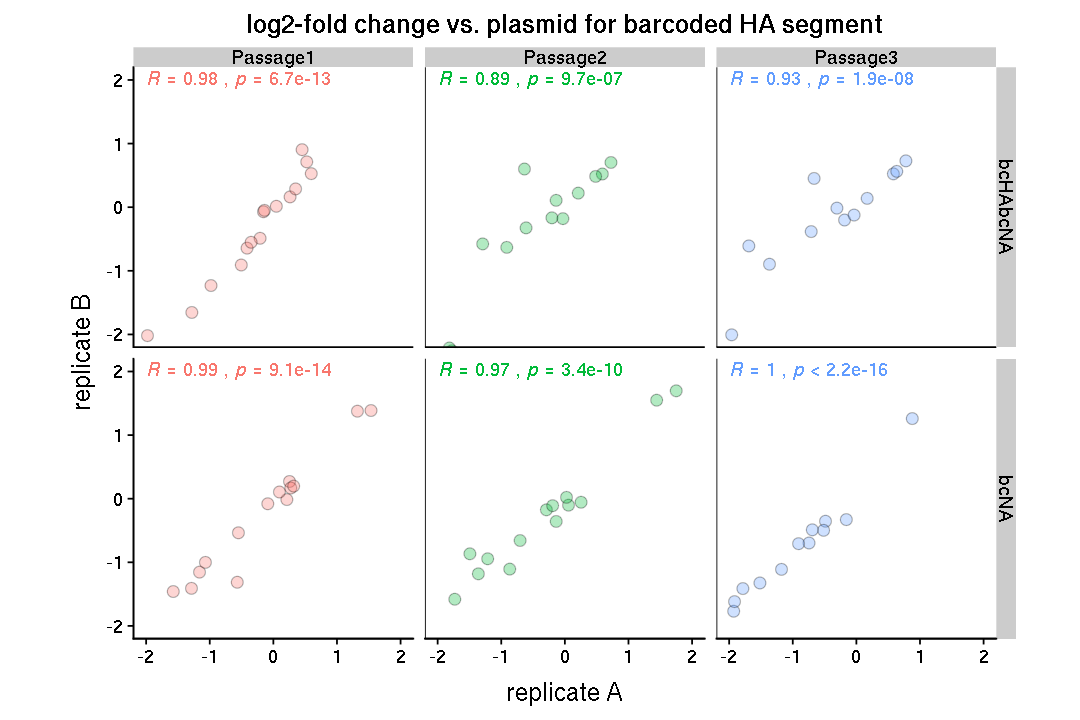

In [11]:
# Plot log2fc_plasmid for fluHA
options(repr.plot.width=9, repr.plot.height=6)

ggplot(
   barcodecounts_vplasmid %>%
      filter(step!='Rescue', step!='Plasmid', gene=='fluNA'),
    aes(A, B, color=step)) +
    facet_grid(barcoded_segments~step) +
  geom_point(aes(fill=step), color="black", pch=21, size=3, alpha=0.3) +
  theme(legend.position='none', aspect.ratio=1) +
  coord_equal(xlim=c(-2,2),ylim=c(-2,2)) +
  stat_cor(method='spearman', label.x = -2, label.y = 2) +
  xlab('replicate A') +
  ylab('replicate B') +
  ggtitle('log2-fold change vs. plasmid for barcoded HA segment') +
  annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
  annotate("segment", x=-Inf, xend=-Inf, y=-Inf, yend=Inf)

## Now plot the barcode frequency over time. 
In the style of Ben tenOever's [barcode distributions](https://www.ncbi.nlm.nih.gov/pubmed/25456074). 

This should be a line plot of some sort.
Because you can't facet on more than 2 variables, will need to limit plot to just technical replicate 1. 
* `facet_wrap`: gene and replicate.
* `color`: barcode
* `x aesthetic`: step
* `y aesthetic`: barcode_freq

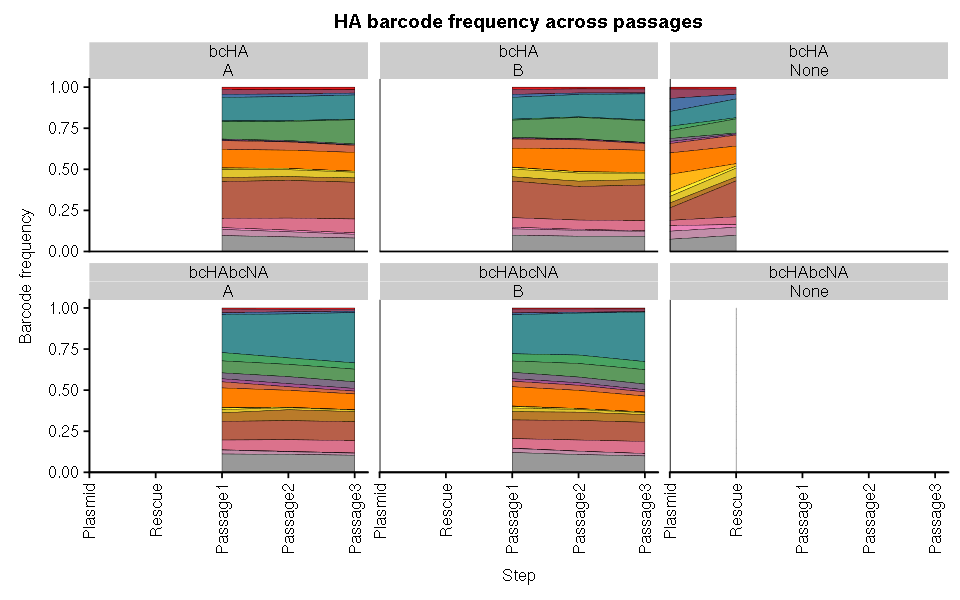

In [12]:
#Plot HA barcode frequencies over time
options(repr.plot.width=8, repr.plot.height=5)

fluHA_nbarcodes = 19
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

ggplot(
    barcodecounts %>% filter(gene == "fluHA"),
    aes(x=step, y=barcode_freq, fill=barcode)) +
  geom_area(colour="black", size=.1, alpha=1, aes(group=barcode)) +
  guides(fill=FALSE) +
  facet_wrap(barcoded_segments~replicate) +
  scale_fill_manual(values = getPalette(fluHA_nbarcodes)) +
  ggtitle('HA barcode frequency across passages') +
  xlab('Step') +
  ylab('Barcode frequency') +
  annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf) +
  annotate("segment", x=-Inf, xend=-Inf, y=-Inf, yend=Inf) +
  scale_x_discrete(expand=expand_scale(mult = c(0, .05))) +
  scale_y_continuous(expand=expand_scale(mult = c(0, .05))) +
  theme(axis.text=element_text(size=10),
       axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
       axis.title=element_text(size=10),
       strip.text=element_text(size=10),
       plot.title = element_text(size=12))

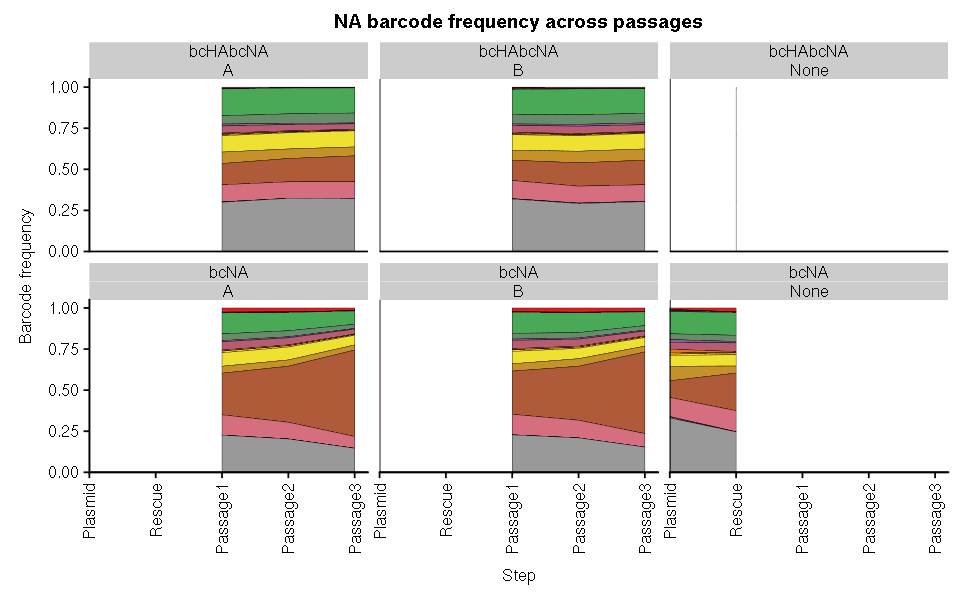

In [13]:
#Plot NA barcode frequencies over time
options(repr.plot.width=8, repr.plot.height=5)

fluNA_nbarcodes = 18
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

ggplot(
    barcodecounts %>% filter(gene == "fluNA"),
    aes(x=step, y=barcode_freq, fill=barcode)) +
  geom_area(colour="black", size=.1, alpha=1, aes(group=barcode)) +
  guides(fill=FALSE) +
  facet_wrap(barcoded_segments~replicate) +
  scale_fill_manual(values = getPalette(fluNA_nbarcodes)) +
  ggtitle('NA barcode frequency across passages') +
  xlab('Step') +
  ylab('Barcode frequency') +
  annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf) +
  annotate("segment", x=-Inf, xend=-Inf, y=-Inf, yend=Inf) +
  scale_x_discrete(expand=expand_scale(mult = c(0, .05))) +
  scale_y_continuous(expand=expand_scale(mult = c(0, .05))) +
  theme(axis.text=element_text(size=10),
       axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
       axis.title=element_text(size=10),
       strip.text=element_text(size=10),
       plot.title = element_text(size=12))